First 5 rows of the dataset:
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_wor

C:\Users\KIIT\AppData\Local\Temp\ipykernel_12020\4105969268.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='diagnosis', data=df, palette='Set2')


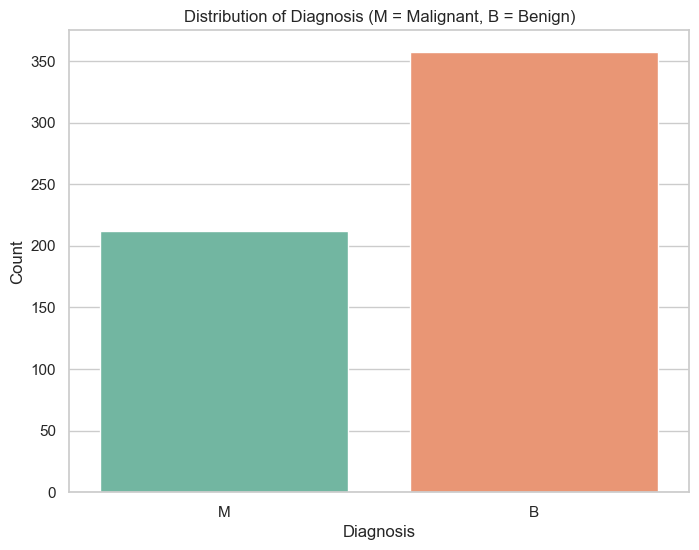


Summary statistics for numerical features:
                 id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
s

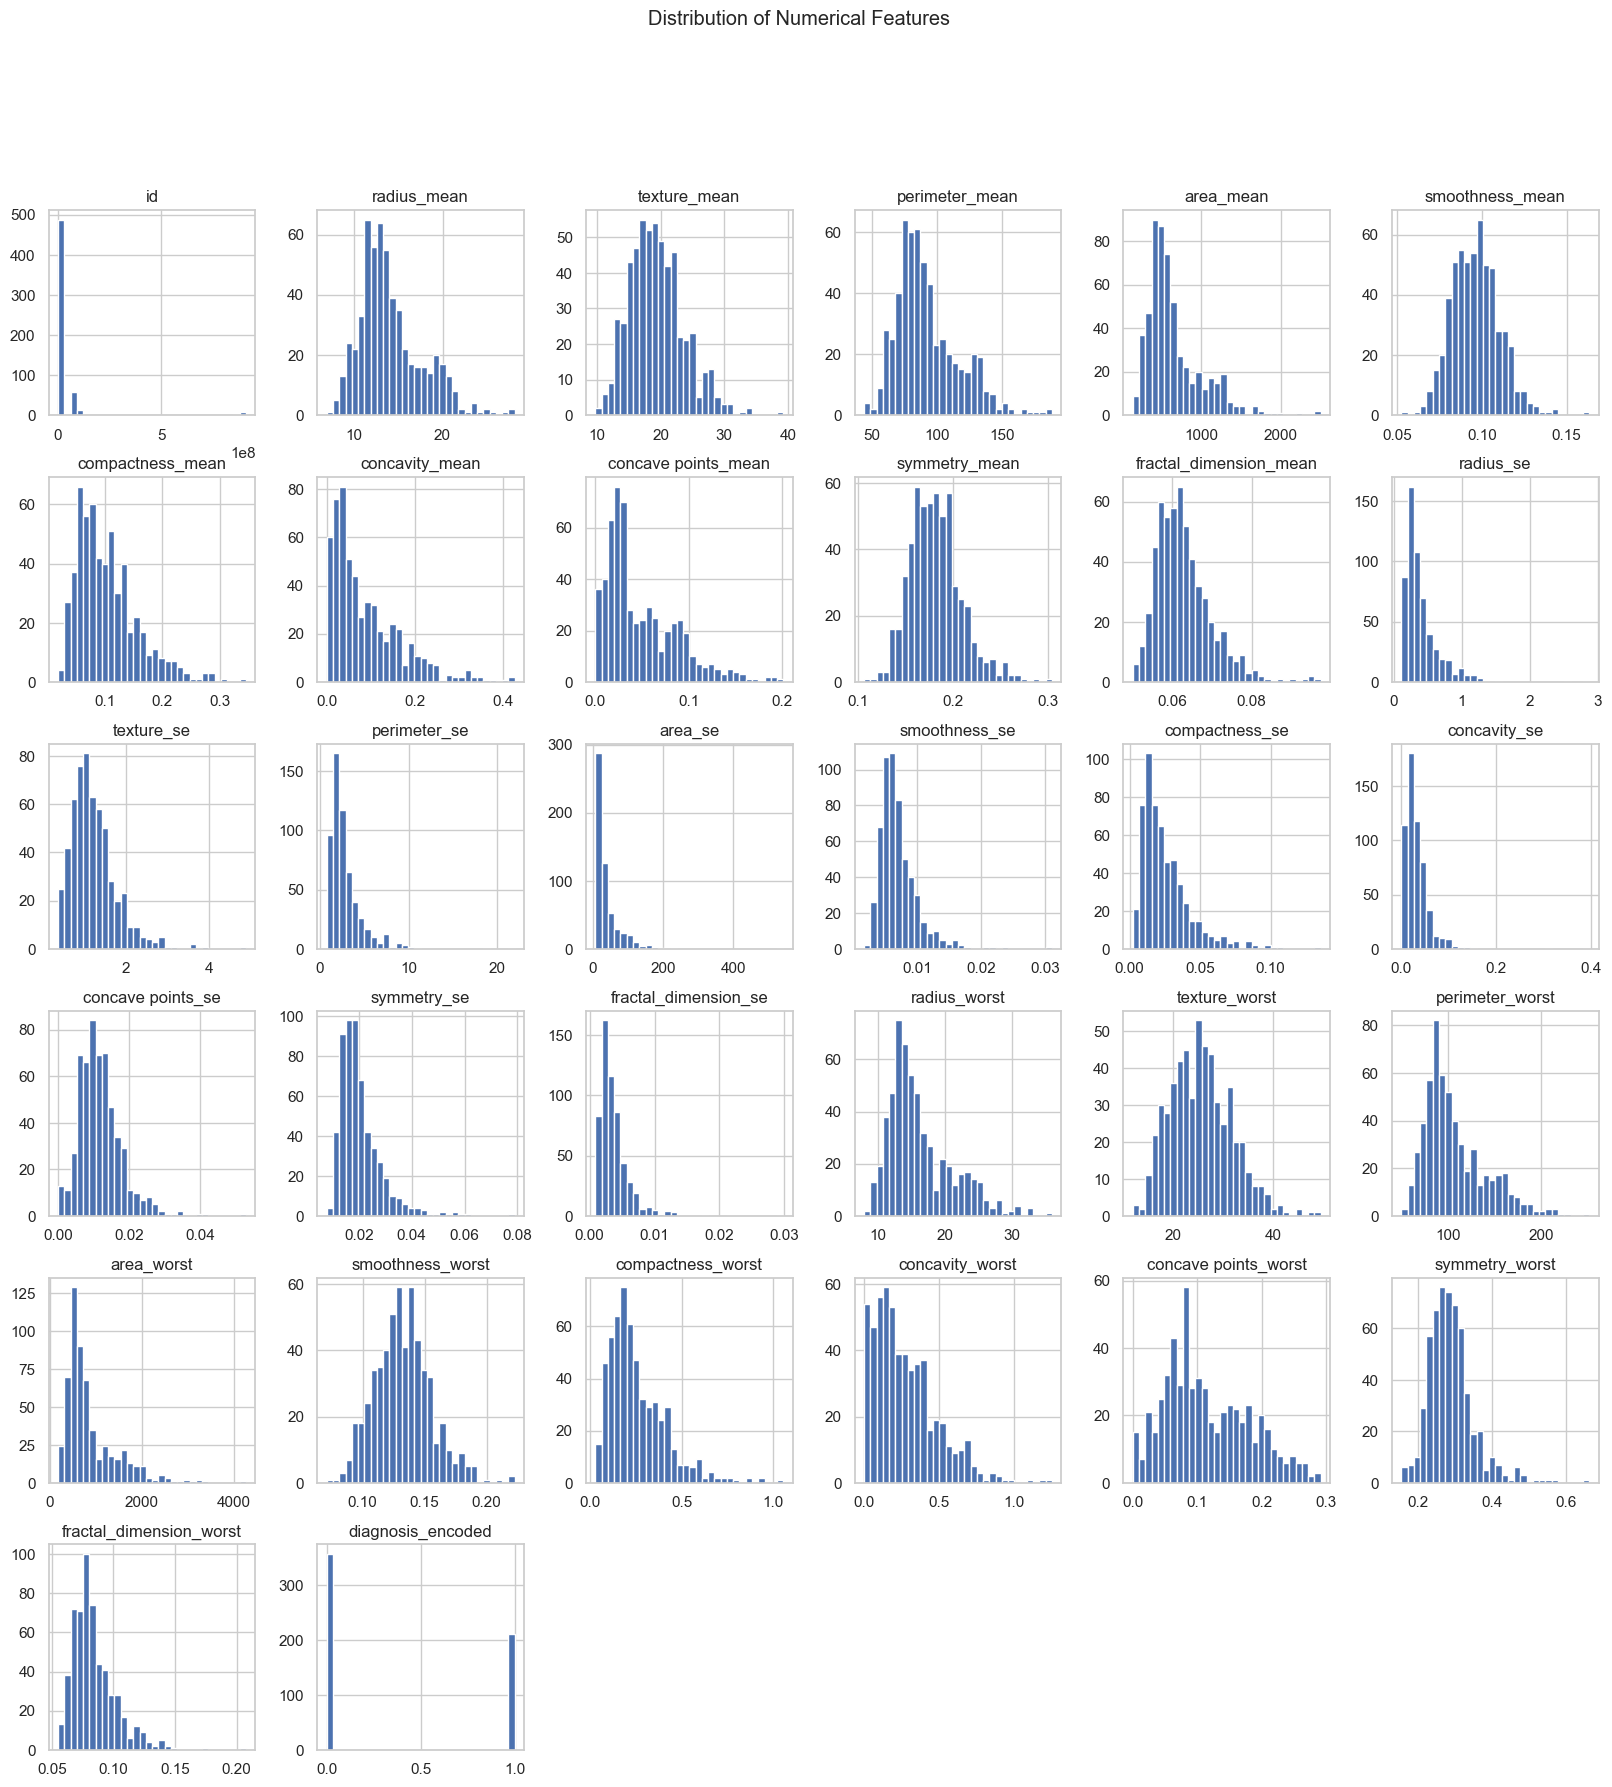

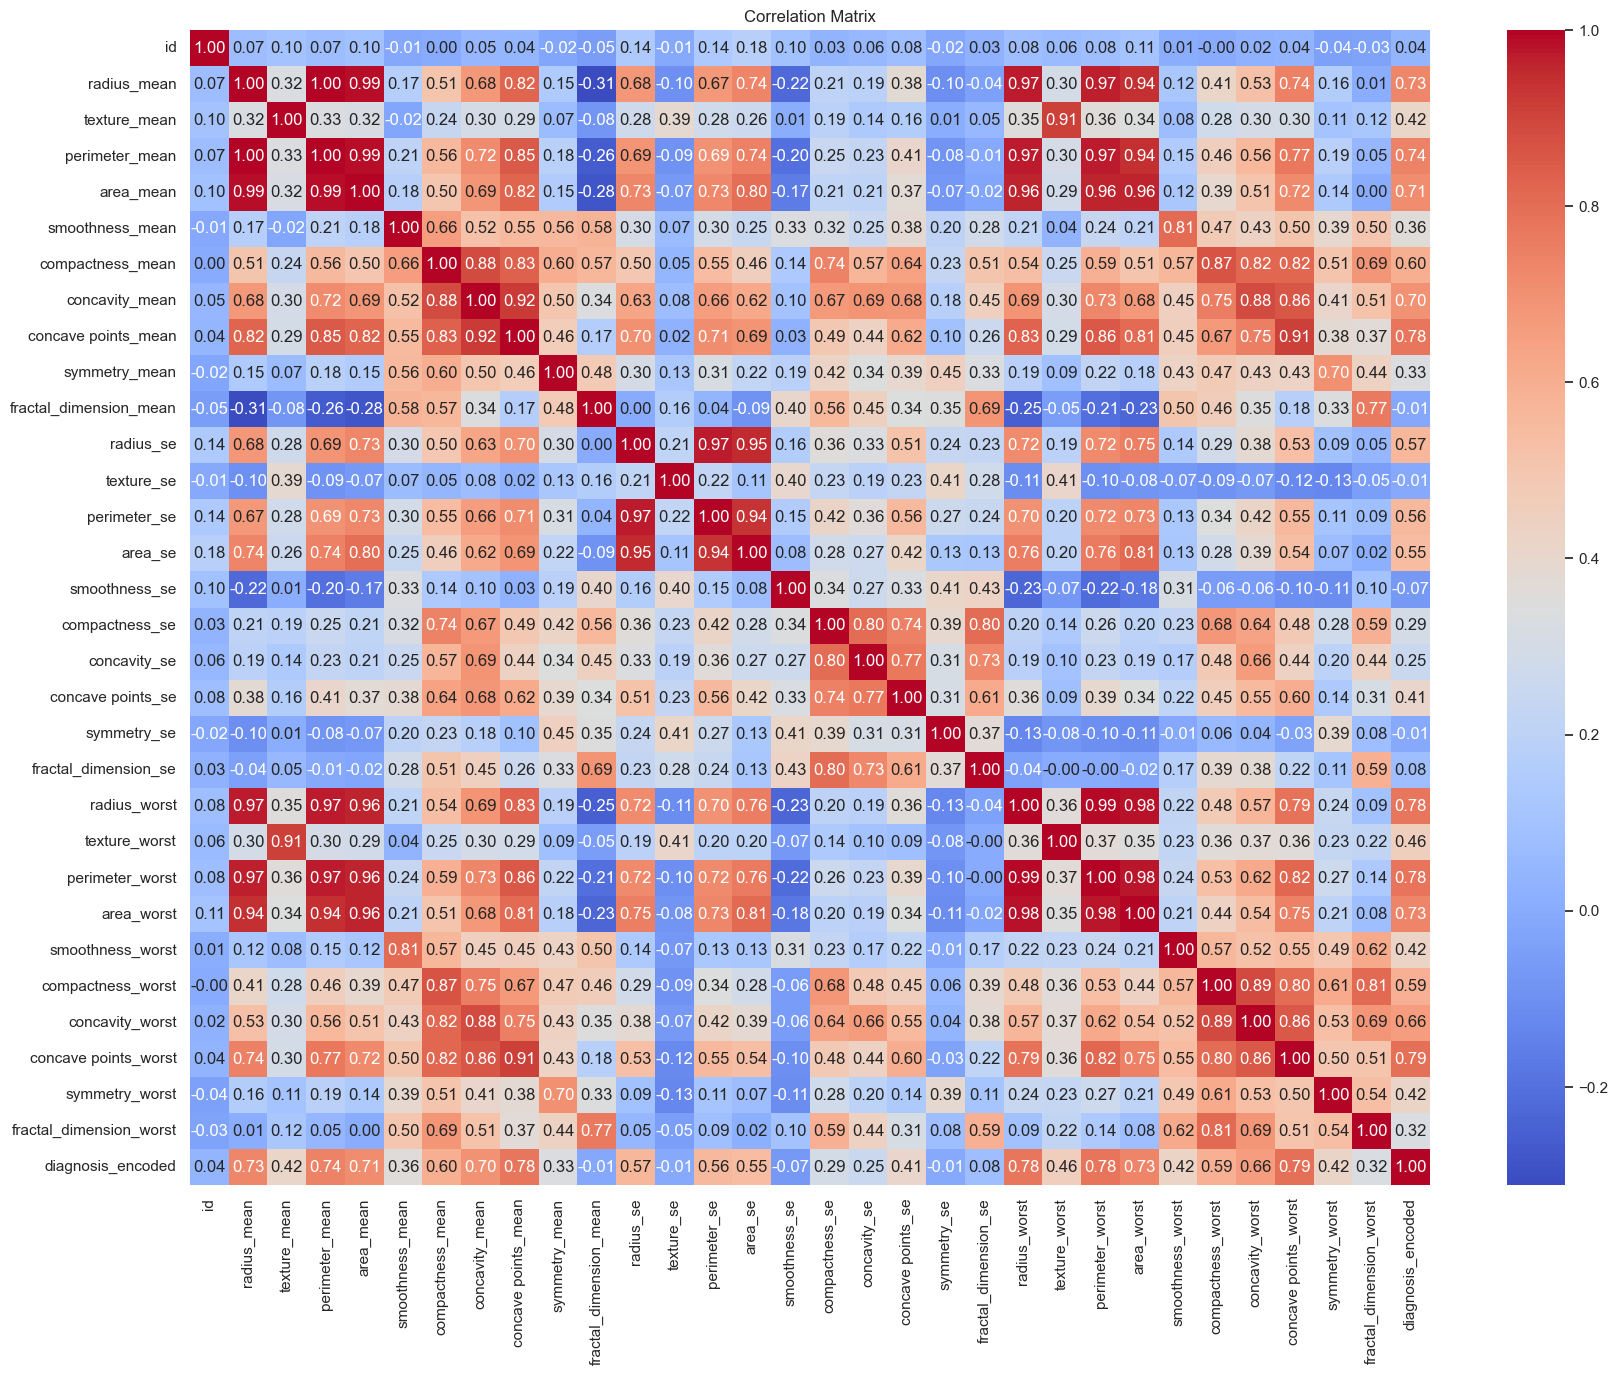

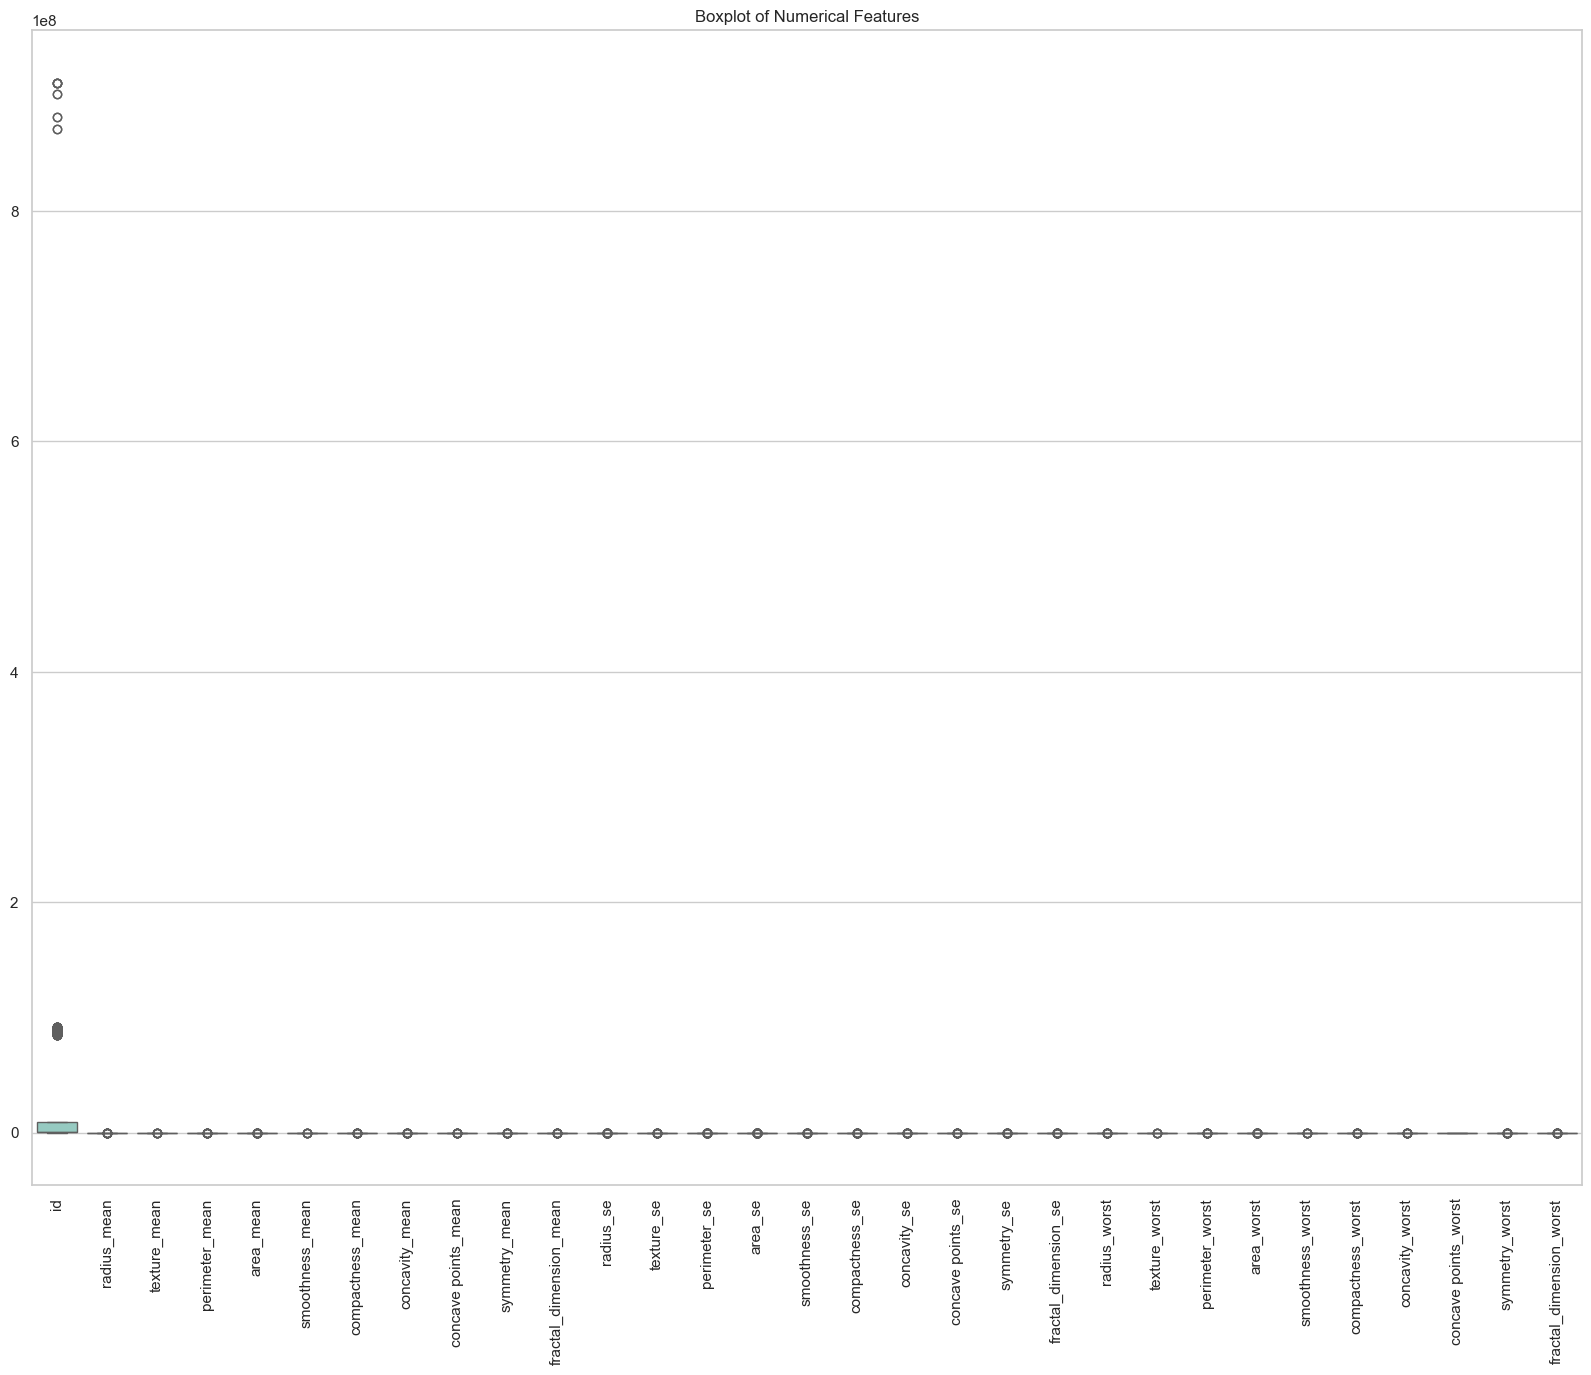


Data exploration completed! Dataset saved to `data/processed/breast_cancer_clean.csv`.


In [9]:
# ---
# jupyter:
#   jupytext:
#     text_representation:
#       extension: .py
#       format_name: light
#       format_version: '1.5'
#       jupytext_version: 1.14.4
#   kernelspec:
#     display_name: Python 3
#     language: python
#     name: python3
# ---

# # Breast Cancer Prediction - Data Exploration

# ## 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for plots
sns.set(style="whitegrid")

# ## 2. Load the Dataset
# Load the dataset from the `data/raw/` folder
df = pd.read_csv('../data/raw/breast-cancer.csv')

# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
print(df.head())

# ## 3. Basic Information About the Dataset
# Check the shape of the dataset (rows, columns)
print("\nShape of the dataset:")
print(df.shape)

# Check column names and data types
print("\nColumn names and data types:")
print(df.info())

# Check for missing values
print("\nMissing values in the dataset:")
print(df.isnull().sum())

# ## 4. Explore the Target Variable
# Check the distribution of the target variable (`diagnosis`)
print("\nDistribution of the target variable (diagnosis):")
print(df['diagnosis'].value_counts())

# Visualize the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='diagnosis', data=df, palette='Set2')
plt.title('Distribution of Diagnosis (M = Malignant, B = Benign)')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()

# ## 5. Encode the Target Variable
# Convert `diagnosis` into binary values:
# - M (Malignant) = 1
# - B (Benign) = 0
df['diagnosis_encoded'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Drop the original `diagnosis` column
df = df.drop('diagnosis', axis=1)

# ## 6. Explore Numerical Features
# Display summary statistics for numerical features
print("\nSummary statistics for numerical features:")
print(df.describe())

# Visualize the distribution of numerical features
df.hist(figsize=(20, 20), bins=30)
plt.suptitle('Distribution of Numerical Features')
plt.show()

# ## 7. Correlation Analysis
# Compute the correlation matrix
corr_matrix = df.corr()

# Visualize the correlation matrix
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# ## 8. Outlier Detection
# Check for outliers using boxplots
plt.figure(figsize=(20, 15))
sns.boxplot(data=df.drop('diagnosis_encoded', axis=1), palette='Set3')
plt.title('Boxplot of Numerical Features')
plt.xticks(rotation=90)
plt.show()

# ## 9. Save the Cleaned Dataset (Optional)
# Save the dataset to the `data/processed/` folder for further use
df.to_csv('../data/processed/breast_cancer_clean.csv', index=False)

print("\nData exploration completed! Dataset saved to `data/processed/breast_cancer_clean.csv`.")